In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23452 entries, 0 to 23451
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              23452 non-null  int64  
 1   workclass        23452 non-null  object 
 2   fnlwgt           23452 non-null  int64  
 3   education        23452 non-null  object 
 4   educational-num  23452 non-null  int64  
 5   marital-status   23452 non-null  object 
 6   occupation       23452 non-null  object 
 7   relationship     23452 non-null  object 
 8   race             23452 non-null  object 
 9   gender           23451 non-null  object 
 10  capital-gain     23451 non-null  float64
 11  capital-loss     23451 non-null  float64
 12  hours-per-week   23451 non-null  float64
 13  native-country   23451 non-null  object 
 14  income           23451 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 2.7+ MB


In [3]:
df['age'] = df['age'].astype('float64')

In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             1
capital-gain       1
capital-loss       1
hours-per-week     1
native-country     1
income             1
dtype: int64

In [6]:
df.shape

(23452, 15)

In [12]:
df['age'].nunique()

73

In [13]:
df['age'].unique()

array([25., 38., 28., 44., 18., 34., 29., 63., 24., 55., 65., 36., 26.,
       58., 48., 43., 20., 37., 40., 72., 45., 22., 23., 54., 32., 46.,
       56., 17., 39., 52., 21., 42., 33., 30., 47., 41., 19., 69., 50.,
       31., 59., 49., 51., 27., 57., 61., 64., 79., 73., 53., 77., 80.,
       62., 35., 68., 66., 75., 60., 67., 71., 70., 90., 81., 74., 78.,
       82., 83., 85., 76., 84., 89., 88., 87.])

In [14]:
for i in df.columns:
    print(i, df[i].nunique())

age 73
workclass 9
fnlwgt 17022
education 16
educational-num 16
marital-status 7
occupation 15
relationship 6
race 6
gender 2
capital-gain 118
capital-loss 89
hours-per-week 90
native-country 41
income 2


In [15]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,23452.000000,2.345200e+04,23452.000000,23451.000000,23451.000000,23451.000000
mean,38.713031,1.899686e+05,10.074109,1071.542109,88.497847,40.424289
std,13.786348,1.058469e+05,2.559773,7448.512448,403.638871,12.426357
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173100e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781340e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.393212e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [16]:
df['occupation'].value_counts()

Prof-specialty       2937
Craft-repair         2901
Exec-managerial      2893
Sales                2710
Adm-clerical         2688
Other-service        2343
Machine-op-inspct    1454
?                    1402
Transport-moving     1123
Handlers-cleaners     973
Tech-support          724
Farming-fishing       708
Protective-serv       468
Priv-house-serv       120
Armed-Forces            8
Name: occupation, dtype: int64

In [17]:
df['gender'].value_counts()

Male      15682
Female     7769
Name: gender, dtype: int64

In [18]:
df['gender'].value_counts(normalize=True)

Male      0.668713
Female    0.331287
Name: gender, dtype: float64

In [22]:
df['occupation'].mode()[0]

'Prof-specialty'

<AxesSubplot:xlabel='age', ylabel='Count'>

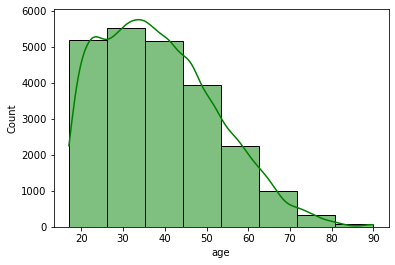

In [41]:
sns.histplot(df['age'], bins=8, kde=True, color='g', legend=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

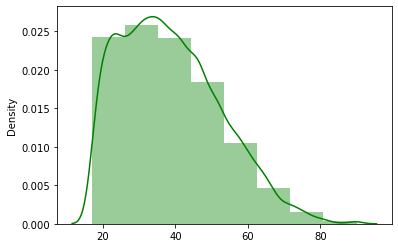

In [46]:
sns.distplot(x=df['age'], bins=8, color='g')

<AxesSubplot:xlabel='age'>

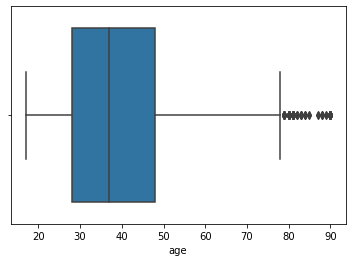

In [48]:
sns.boxplot(data=df, x='age')